# Data Science - Song Popularity Prediction & Song Recommendation (Group I)

## Statistical Analysis

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats

### Reading Dataset

In [2]:
df = pd.read_csv('cleaned_spotify.csv')

### Correlation Coefficients and Plots

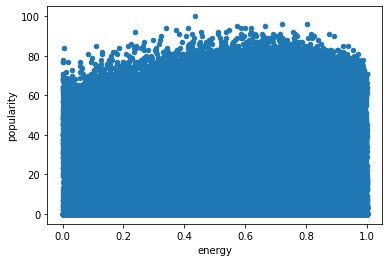

energy (0.34959363557420553, 0.0)
energy SpearmanrResult(correlation=0.3659106517114798, pvalue=0.0)


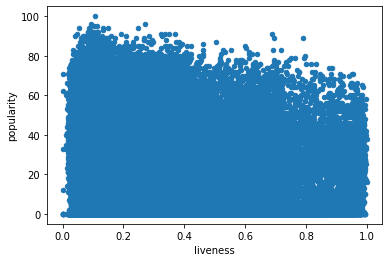

liveness (-0.08976391640262653, 4.831101268218299e-243)
liveness SpearmanrResult(correlation=-0.12344316571071354, pvalue=0.0)


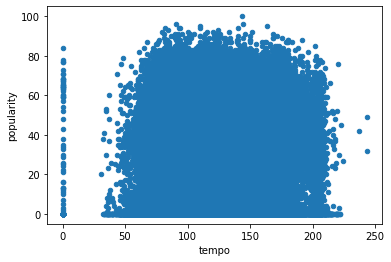

tempo (0.1022627669110888, 3.5739355e-315)
tempo SpearmanrResult(correlation=0.10310227041553424, pvalue=0.0)


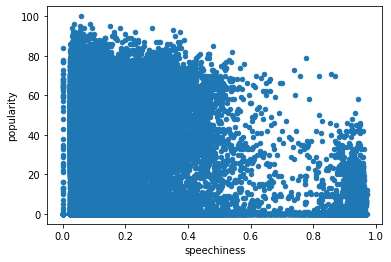

speechiness (-0.22331039532521874, 0.0)
speechiness SpearmanrResult(correlation=-0.19539625335605848, pvalue=0.0)


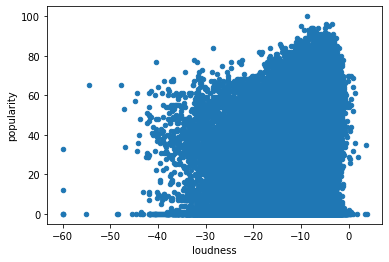

loudness (0.35678990346494266, 0.0)
loudness SpearmanrResult(correlation=0.3807479207960372, pvalue=0.0)


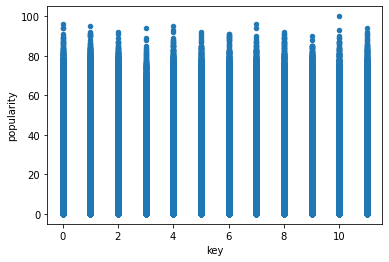

key (0.0010897571680228823, 0.6866738710570897)
key SpearmanrResult(correlation=0.0014367513776887956, pvalue=0.5948556684674834)


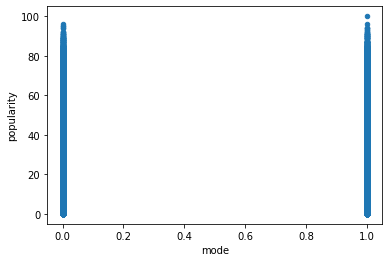

mode (0.0022366056031722197, 0.40773901714326455)
mode SpearmanrResult(correlation=0.007372167078065612, pvalue=0.006355762599225088)


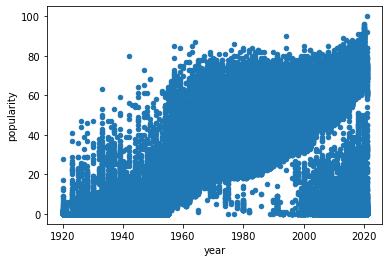

year (0.5585824105337462, 0.0)
year SpearmanrResult(correlation=0.5560364459778695, pvalue=0.0)


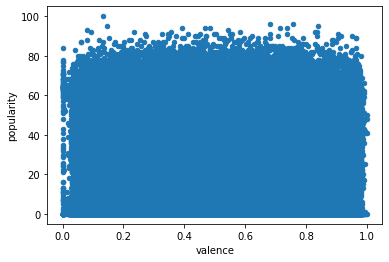

valence (0.052286328541696174, 1.4656630940999439e-83)
valence SpearmanrResult(correlation=0.052272250130223304, pvalue=1.6220542164868295e-83)


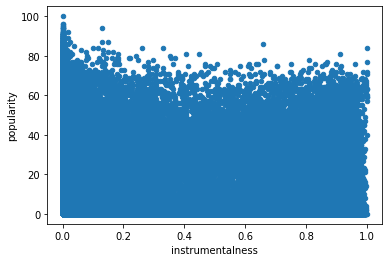

instrumentalness (-0.291309853524475, 0.0)
instrumentalness SpearmanrResult(correlation=-0.2773890163390314, pvalue=0.0)


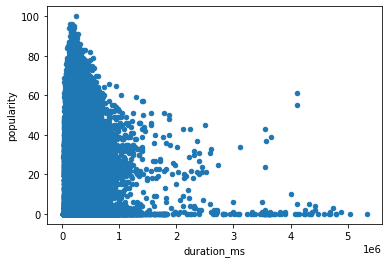

duration_ms (0.030480024844638166, 1.5602902278352723e-29)
duration_ms SpearmanrResult(correlation=0.2025057199643507, pvalue=0.0)


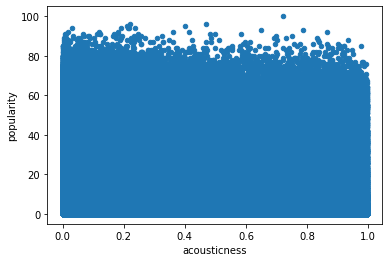

acousticness (-0.415653769196235, 0.0)
acousticness SpearmanrResult(correlation=-0.4182629162639103, pvalue=0.0)


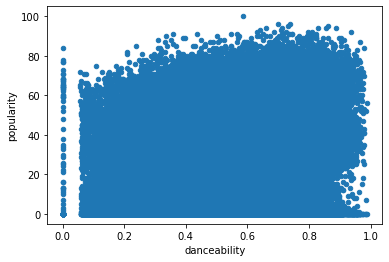

danceability (0.12696151012956786, 0.0)
danceability SpearmanrResult(correlation=0.10330133877137972, pvalue=0.0)


In [3]:
### Review whether filtering to songs newer than 1980 provide more interesting results (RETIRED)
## Filter out all years less than 1980
# df.drop(df.index[df['year'] < 1980], inplace=True)

## Plot all data against popularity and calculate pearson and spearman coefficients
l = ["energy", "liveness", "tempo", "speechiness", "loudness", "key", "mode", "year", "valence", "instrumentalness", "duration_ms", "acousticness", "danceability"]
for i in range(len(l)):
        df.plot.scatter(x=l[i], y='popularity')
        plt.show()
        print(l[i], stats.pearsonr(df[l[i]], df['popularity']))
        print(l[i], stats.spearmanr(df[l[i]], df['popularity']))

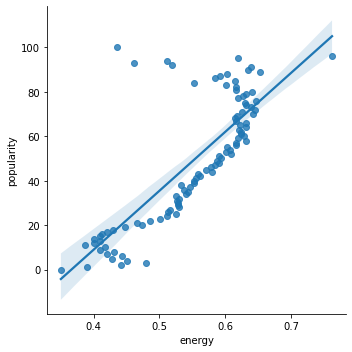

energy (0.7805997418563599, 2.636410381971405e-21)
energy SpearmanrResult(correlation=0.776766189137323, pvalue=5.4859070289562586e-21)


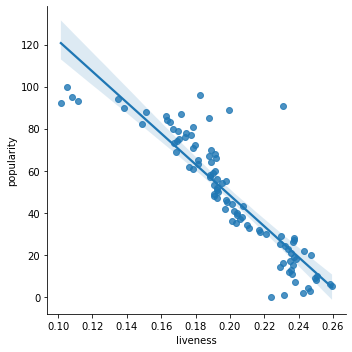

liveness (-0.8917057074812252, 8.097598950847149e-35)
liveness SpearmanrResult(correlation=-0.9177807955422093, pvalue=2.7490085914052344e-40)


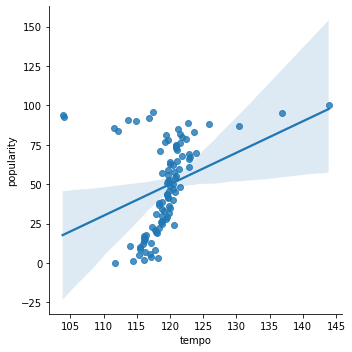

tempo (0.3321743385262504, 0.000833024365751402)
tempo SpearmanrResult(correlation=0.5127288028613507, pvalue=6.755476532144912e-08)


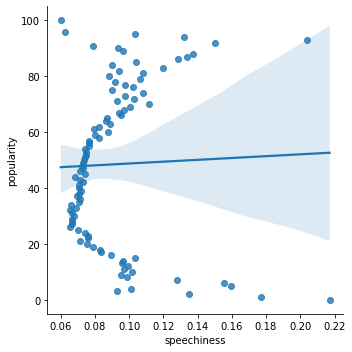

speechiness (0.03304741976356628, 0.7466623289334892)
speechiness SpearmanrResult(correlation=0.1577887012349457, pvalue=0.12072816597619343)


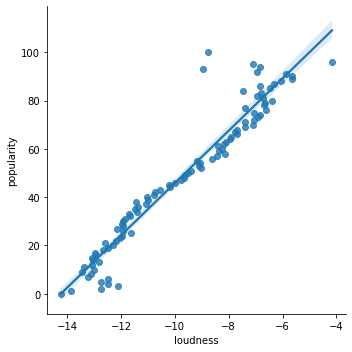

loudness (0.960051958379823, 6.724048022954659e-55)
loudness SpearmanrResult(correlation=0.9601400072681368, pvalue=6.060813369734172e-55)


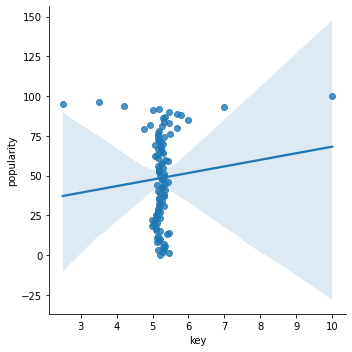

key (0.09322323715727346, 0.36123602671850924)
key SpearmanrResult(correlation=0.1266381253253995, pvalue=0.21402340961900934)


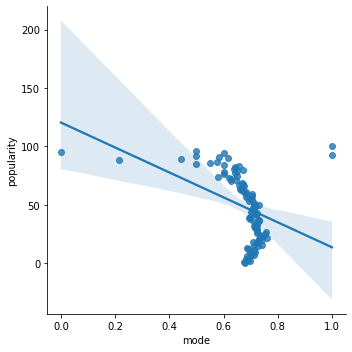

mode (-0.41930271109418943, 1.7280948020796882e-05)
mode SpearmanrResult(correlation=-0.6306121929669397, pvalue=3.4310799924087724e-12)


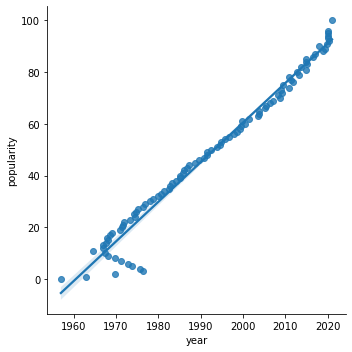

year (0.9863830868348621, 4.553079584809341e-77)
year SpearmanrResult(correlation=0.9845515294079837, pvalue=1.8646304339159484e-74)


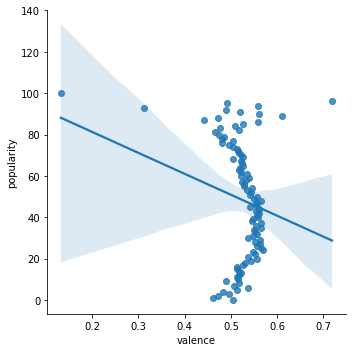

valence (-0.20410104662138356, 0.04381609361004196)
valence SpearmanrResult(correlation=-0.15712564313447963, pvalue=0.12231690442039311)


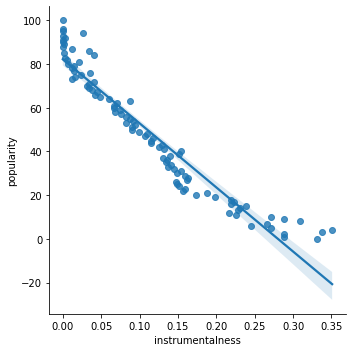

instrumentalness (-0.961674227259293, 9.548621546599352e-56)
instrumentalness SpearmanrResult(correlation=-0.9868025935772621, pvalue=1.0237709875325077e-77)


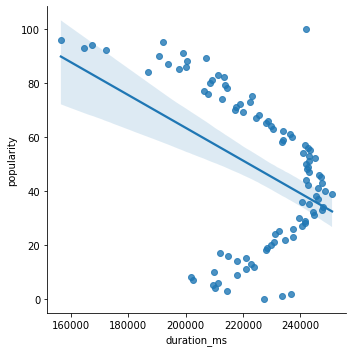

duration_ms (-0.43002481740071935, 9.908622694424922e-06)
duration_ms SpearmanrResult(correlation=-0.3416470618237923, pvalue=0.0005754096607789602)


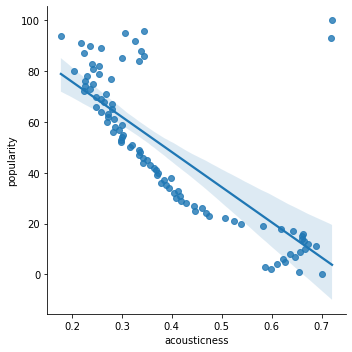

acousticness (-0.7530001074277654, 3.806574690713933e-19)
acousticness SpearmanrResult(correlation=-0.7880636790798793, pvalue=6.06303214224104e-22)


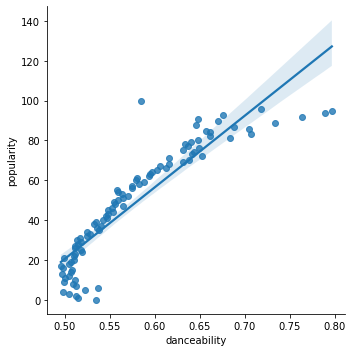

danceability (0.9054143542489627, 1.702005984636988e-37)
danceability SpearmanrResult(correlation=0.9508061893923454, pvalue=1.183293815991194e-50)


In [4]:
## Determine coefficients based on average attribute over popularity
df1 = df.groupby('popularity')
df1 = df1.mean()
df1 = df1.reset_index()
l = ["energy", "liveness", "tempo", "speechiness", "loudness", "key", "mode", "year", "valence", "instrumentalness", "duration_ms", "acousticness", "danceability"]
for i in range(len(l)):
        # df1.plot.scatter(x=l[i], y='popularity')
        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
        # sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired", order=2)
        plt.show()
        print(l[i], stats.pearsonr(df1[l[i]], df1['popularity']))
        print(l[i], stats.spearmanr(df1[l[i]], df1['popularity']))

## Machine Learning

### Classification

#### Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
from scipy.stats import chi2_contingency 
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

#### Start with fresh dataframe(s)

In [5]:
# df2 = pd.read_csv('cleaned_spotify.csv')
df3 = pd.read_csv('cleaned_spotify.csv')

#### Establish training and testing sets

In [ ]:
print("number of samples: " + str(len(df3)))

## Sampling features
# X1 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
# X2 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo', 'explicit', 'key', 'mode', 'year']]
X3 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo', 'explicit', 'key', 'mode']]
y = df3['popularity']
mean = y.mean()
print("the mean is: " + str(mean))

## Feature Engineering for Changing Year to Age
age = []
for i in range(len(df3['year'])):
    age.append(2022 - df3['year'][i])
X3['age'] = age

## Training/Testing Split
X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.2)

## Classify data
y_bool_train = [i > mean for i in y_train]
for i in range(len(y_bool_train)):
    if y_bool_train[i]:
        y_bool_train[i] = 1
    else:
        y_bool_train[i] = 0

y_bool_test = [i > mean for i in y_test]
for i in range(len(y_bool_test)):
    if y_bool_test[i]:
        y_bool_test[i] = 1
    else:
        y_bool_test[i] = 0

print("number of popular samples: " + str(sum(y_bool_test) + sum(y_bool_train)))

#### Assessing Classification Models

In [ ]:
## Model 1: Logistic Regression
print('Logistic Regression')
model1 = LogisticRegression(solver='liblinear')
lrscores = cross_val_score(model1, X_train, y_bool_train, scoring='f1', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model1.fit(X_train, y_bool_train)
pred = model1.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 2: Decision Tree Classifier
print()
print('Decision Tree Classifier')
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
dtscores = cross_val_score(model2, X_train, y_bool_train, scoring='f1', cv=5)
print(dtscores)
print('avg cv score: ' + str(sum(dtscores)/len(dtscores)))
model2.fit(X_train, y_bool_train)
pred = model2.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 3: K Nearest Neighbor Classifier
print()
print('K Nearest Neighbor Classifier')
model3 = KNeighborsClassifier()
knnscores = cross_val_score(model3, X_train, y_bool_train, scoring='f1', cv=5)
print(knnscores)
print('avg cv score: ' + str(sum(knnscores)/len(knnscores)))
model3.fit(X_train, y_bool_train)
pred = model3.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 4: Voting Classifier with Decision Tree
print()
print('Voting Classifier with Decision Tree')
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
v = []
for i in range(11):
    v.append(('DTC'+str(i), classifier))
model4 = VotingClassifier(estimators=v, voting ='hard')
vcscores = cross_val_score(model4, X_train, y_bool_train, scoring='f1', cv=5)
print(vcscores)
print('avg cv score: ' + str(sum(vcscores)/len(vcscores)))
model4.fit(X_train, y_bool_train)
pred = model4.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 5: Bagging Classifier with Decision Tree
print()
print('Bagging Classifier with Decision Tree')
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
model5 = BaggingClassifier(base_estimator=classifier)
bcscores = cross_val_score(model5, X_train, y_bool_train, scoring='f1', cv=5)
print(bcscores)
print('avg cv score: ' + str(sum(bcscores)/len(bcscores)))
model5.fit(X_train, y_bool_train)
pred = model5.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 6: Voting Classifier with Decision Tree and kNN
print()
print('Voting Classifier with Decision Tree and KNN')
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
v = []
for i in range(5):
    v.append(('DTC'+str(i), classifier))
classifier = KNeighborsClassifier()
v = []
for i in range(5):
    v.append(('KNN'+str(i), classifier))
model6 = VotingClassifier(estimators=v, voting ='hard')
vc2scores = cross_val_score(model6, X_train, y_bool_train, scoring='f1', cv=5)
print(vc2scores)
print('avg cv score: ' + str(sum(vc2scores)/len(vc2scores)))
model6.fit(X_train, y_bool_train)
pred = model6.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

## Model 7: Random Forest Classifier
## Model 8: Extra Trees Classifier
## Model 9: AdaBoost Classifier
## Model 10: Gradient Boosting Classifier
## Model 11: HistGradient Boosting Classifier
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
hgbc = HistGradientBoostingClassifier()
rfcscores = cross_val_score(rfc, X_train, y_bool_train, scoring='f1', cv=5)
etcscores = cross_val_score(etc, X_train, y_bool_train, scoring='f1', cv=5)
abcscores = cross_val_score(abc, X_train, y_bool_train, scoring='f1', cv=5)
gbcscores = cross_val_score(gbc, X_train, y_bool_train, scoring='f1', cv=5)
hgbcscores = cross_val_score(hgbc, X_train, y_bool_train, scoring='f1', cv=5)
print("scores for RandomForestClassifier: " + str(rfcscores) + ",\n   avg: " + str(sum(rfcscores)/len(rfcscores)))
print("scores for ExtraTreesClassifier: " + str(etcscores) + ",\n   avg: " + str(sum(etcscores)/len(etcscores)))
print("scores for AdaBoostClassifier: " + str(abcscores) + ",\n   avg: " + str(sum(abcscores)/len(abcscores)))
print("scores for GradientBoostingClassifier: " + str(gbcscores) + ",\n   avg: " + str(sum(gbcscores)/len(gbcscores)))
print("scores for HistGradientBoostingClassifier: " + str(hgbcscores) + ",\n   avg: " + str(sum(hgbcscores)/len(hgbcscores)))

### Regression

#### Importing Packages

In [ ]:
import pandas as pd
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

#### Start with fresh dataframe(s)

In [ ]:
df = pd.read_csv('cleaned_spotify.csv')

#### Establish training and testing sets

In [8]:
X = df[['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'year']]
y = df['popularity']

## Feature Engineering for Changing Year to Age
max_year = max(X['year'])
X['age'] = abs(max_year - df['year'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

C:\Users\elite\AppData\Local\Temp/ipykernel_13520/1297089228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = age


NameError: name 'train_test_split' is not defined

#### Assessing Regression Models

In [ ]:
print('Linear Regression')
linear_regression_model = LinearRegression()
lr_scores = cross_val_score(linear_regression_model, X_train, y_train, cv=5, scoring='r2')
print(lr_scores)
print('avg cv score: ', mean(lr_scores))
# model5.fit(X_train, y_train)
# pred = model5.predict(X_test)
# print('score on test data: ' + str(r2_score(y_test, pred)))

# Linear Regression
# [0.40482407 0.41161445 0.40603056 0.40546286 0.41217253]
# avg cv score:  0.4080208958301596

# print()
# print('Support Vector Regression')
# svm = svm.SVR()
# sv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='r2')
# print(sv_scores)
# print('avg cv score: ', mean(sv_scores))

# # Support Vector Regression
# # [0.0767706  0.07914685 0.07777545 0.07724948 0.07266257]
# # avg cv score:  0.07672099037137044

# print()
# print('Nearest Neighbors Regression')
# knr = neighbors.KNeighborsRegressor()
# knr_scores = cross_val_score(knr, X_train, y_train, cv=5, scoring='r2')
# print(knr_scores)
# print('avg cv score: ', mean(knr_scores))

# # Nearest Neighbors Regression
# # [0.27771797 0.27675422 0.28411321 0.27036806 0.27996391]
# # avg cv score:  0.277783474854868

# print()
# print('Decision Tree Regression')
# clf = tree.DecisionTreeRegressor()
# clf_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
# print(clf_scores)
# print('avg cv score: ', mean(clf_scores))
# # Decision Tree Regression
# # [0.3542     0.35530328 0.32938688 0.35318616 0.33816968]
# # avg cv score:  0.34604920139355017

print()
print('Random Forest Regressor')
rfr = RandomForestRegressor()
rfr_scores = cross_val_score(rfr, X_train, y_train, cv=5, scoring='r2')
print(rfr_scores)
print('avg cv score: ', mean(rfr_scores))
# Random Forest Regressor
# [0.68140303 0.67684171 0.67704753 0.67795496 0.67941476]
# avg cv score:  0.6785323969124057

print()
print('Gradient Boosting Regression')
gradient_boosting_reg = GradientBoostingRegressor()
# gradient_boosting_reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
gb_scores = cross_val_score(gradient_boosting_reg, X_train, y_train, cv=5, scoring='r2')
print(gb_scores)
print('avg cv score: ', mean(gb_scores))
# model4.fit(X_train, y_train)
# pred = model4.predict(X_test)
# print('score on test data: ' + str(r2_score(y_test, pred)))

# Gradient Boosting Regression
# [0.64190915 0.63607062 0.63602055 0.63823954 0.6386349 ]
# avg cv score:  0.6381749532263363
